In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
dataset = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'

df = pd.read_csv(dataset, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
#'buying' --> buying price 
#'maint' --> price of the maintenance 
#'doors' --> number of doors
#'persons' --> capacity in terms of persons 
#'lug_boot' --> the size of luggage boot 
#'safety' --> estimated safety of the car 
#'class' --> car acceptability

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


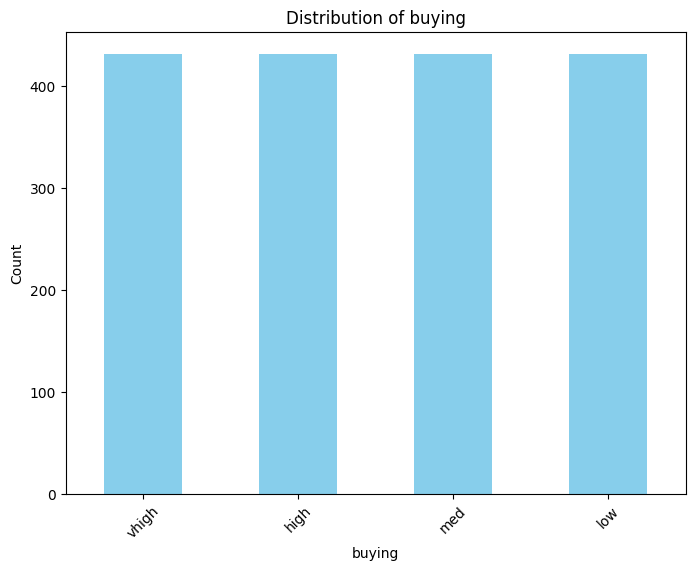

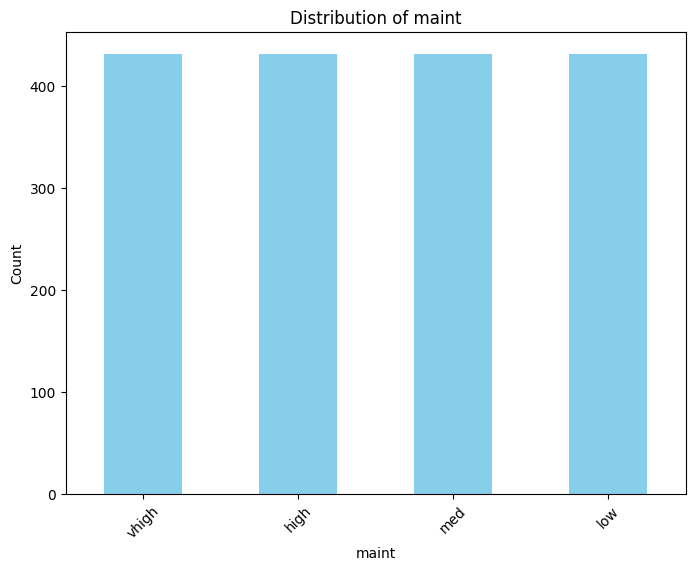

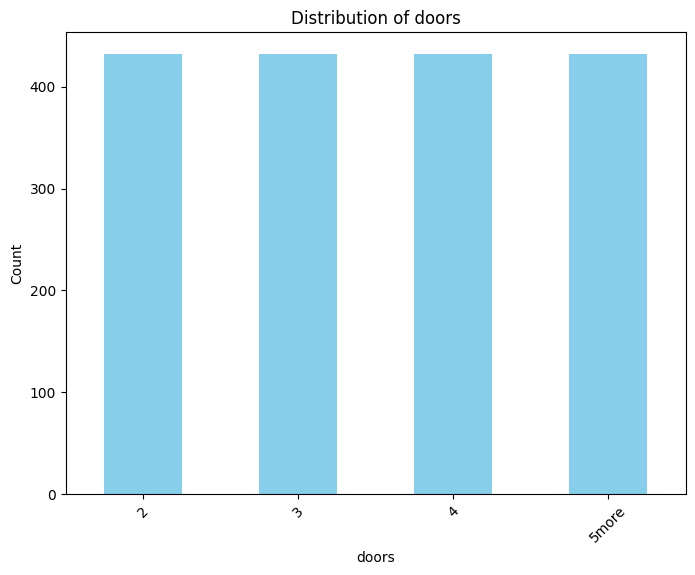

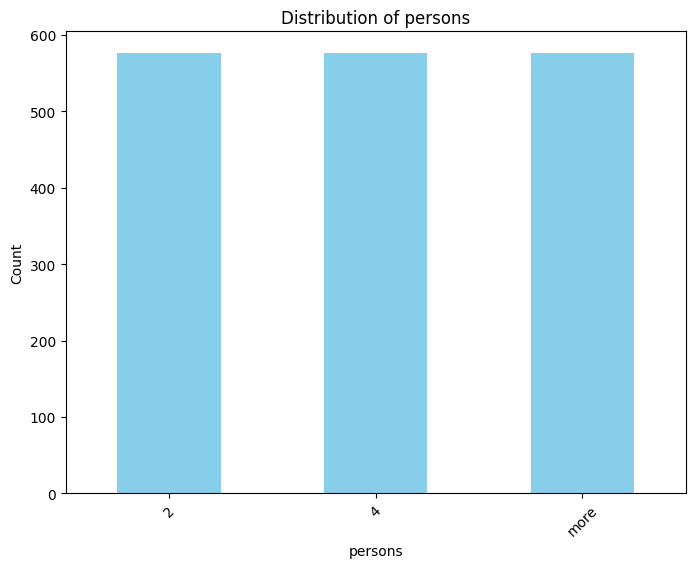

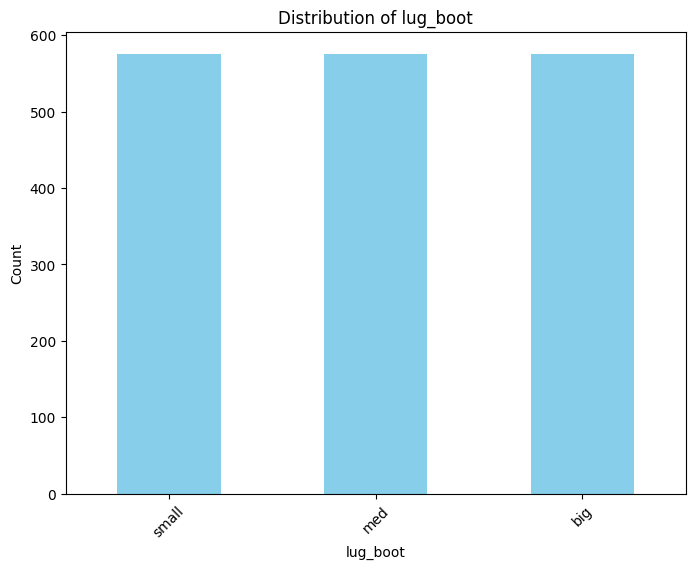

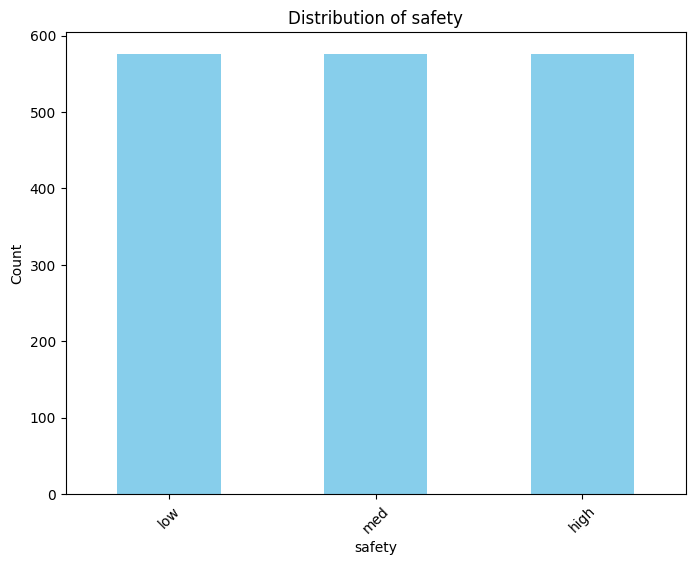

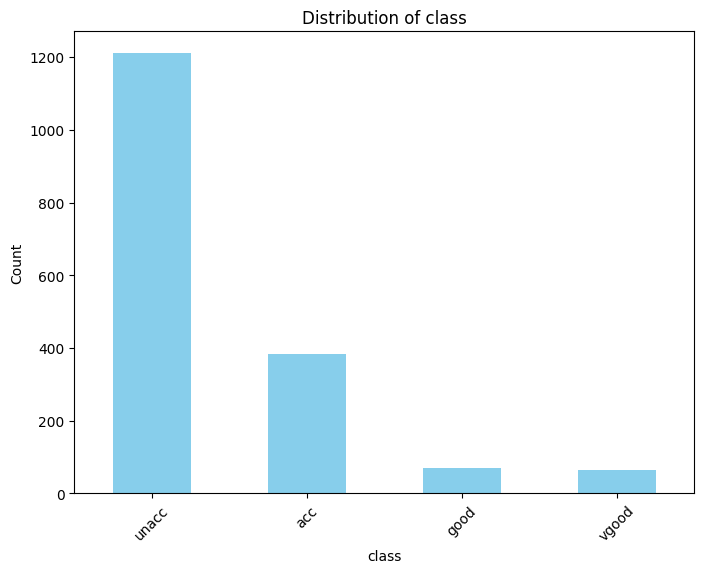

In [11]:
import matplotlib.pyplot as plt

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    plt.figure(figsize=(8, 6))  
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()


In [12]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    
    print(df[col].value_counts())   

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print('-' * 40)


Unique values in 'buying':
['vhigh' 'high' 'med' 'low']
----------------------------------------
Unique values in 'maint':
['vhigh' 'high' 'med' 'low']
----------------------------------------
Unique values in 'doors':
['2' '3' '4' '5more']
----------------------------------------
Unique values in 'persons':
['2' '4' 'more']
----------------------------------------
Unique values in 'lug_boot':
['small' 'med' 'big']
----------------------------------------
Unique values in 'safety':
['low' 'med' 'high']
----------------------------------------
Unique values in 'class':
['unacc' 'acc' 'vgood' 'good']
----------------------------------------


In [14]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [15]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
X = df.drop(['class'], axis=1)

y = df['class']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((1157, 6), (571, 6), (1157,), (571,))

In [19]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [21]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [25]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for col in col_names:
    unique_values = X_train[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print('-' * 40)


Unique values in 'buying':
[1 2 3 4]
----------------------------------------
Unique values in 'maint':
[1 2 3 4]
----------------------------------------
Unique values in 'doors':
[1 2 3 4]
----------------------------------------
Unique values in 'persons':
[1 2 3]
----------------------------------------
Unique values in 'lug_boot':
[1 2 3]
----------------------------------------
Unique values in 'safety':
[1 2 3]
----------------------------------------


In [26]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for col in col_names:
    unique_values = X_test[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print('-' * 40)


Unique values in 'buying':
[2 4 3 1]
----------------------------------------
Unique values in 'maint':
[2 3 1 4]
----------------------------------------
Unique values in 'doors':
[4 3 2 1]
----------------------------------------
Unique values in 'persons':
[3 2 1]
----------------------------------------
Unique values in 'lug_boot':
[1 3 2]
----------------------------------------
Unique values in 'safety':
[2 3 1]
----------------------------------------


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy','log_loss']
}

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')  

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[109  13   6   1]
 [  0  19   0   1]
 [  7   0 390   0]
 [  3   0   0  22]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.84      0.88       129
        good       0.59      0.95      0.73        20
       unacc       0.98      0.98      0.98       397
       vgood       0.92      0.88      0.90        25

    accuracy                           0.95       571
   macro avg       0.85      0.91      0.87       571
weighted avg       0.95      0.95      0.95       571



In [32]:
import pandas as pd

feature_importances = best_rfc.feature_importances_

feature_scores = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

safety      0.265957
persons     0.208467
maint       0.176277
lug_boot    0.153585
buying      0.129288
doors       0.066427
dtype: float64


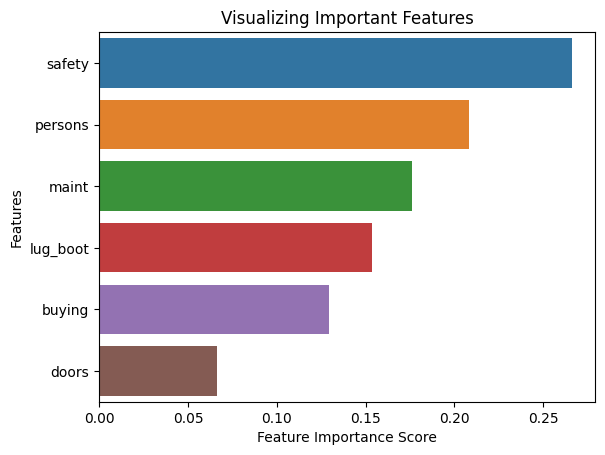

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [34]:
X = df.drop(['class','doors'], axis=1)

y = df['class']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [37]:
X_train.head()

,buying,maint,persons,lug_boot,safety
48,1,1,1,1,1
468,2,1,2,2,1
155,1,2,1,2,2
1721,3,3,1,2,2
1208,4,3,1,2,2


In [38]:
X_test.head()

,buying,maint,persons,lug_boot,safety
599,2,2,3,1,2
1201,4,3,2,1,3
628,2,2,3,3,3
1498,3,2,2,1,3
1263,4,3,1,1,1


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy','log_loss']
}

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')  

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)

print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimator

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108  12   6   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.84      0.86       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.88      0.83       571
weighted avg       0.94      0.93      0.94       571

